# Plot size distribution - Casy counter 
### Gabi - 10/05/2016
Jens Hahn - 21/08/2016

## 1. <a href=#readdata>Read </a>*Excel* sheet in *pandas*
## 2. <a href=#sizedist> Plot </a> size distribution of cells per sample

### Import packages
1. **matplotlib** for plotting 
2. **pandas** for data analysis

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import numpy as np
import scipy as sci

<a name='readdata' />

### Read *Excel* sheet in *pandas*
Prepare lists and Series for plotting

In [4]:
# load Excel sheet in pandas Dataframe
df = pd.read_excel('./CASY/20160510_CASY.xlsx', sheetname='Tabelle3')

In [5]:
# get sizes of cells (columns in Dataframe)
sizes = df.columns[7:]

In [37]:
# get data, remove metainformation
df_times = df.set_index('Time')
df_times = df_times[sizes]
df_times = df_times.T

In [38]:
# get sample names and time points
sample_names = list(df_times.columns)
sample_names[0] = '0A'
sample_names[1] = '0B'
time_names = list(df_times.index)

<a name='sizedist' />

### Plot size distribution of cells per sample

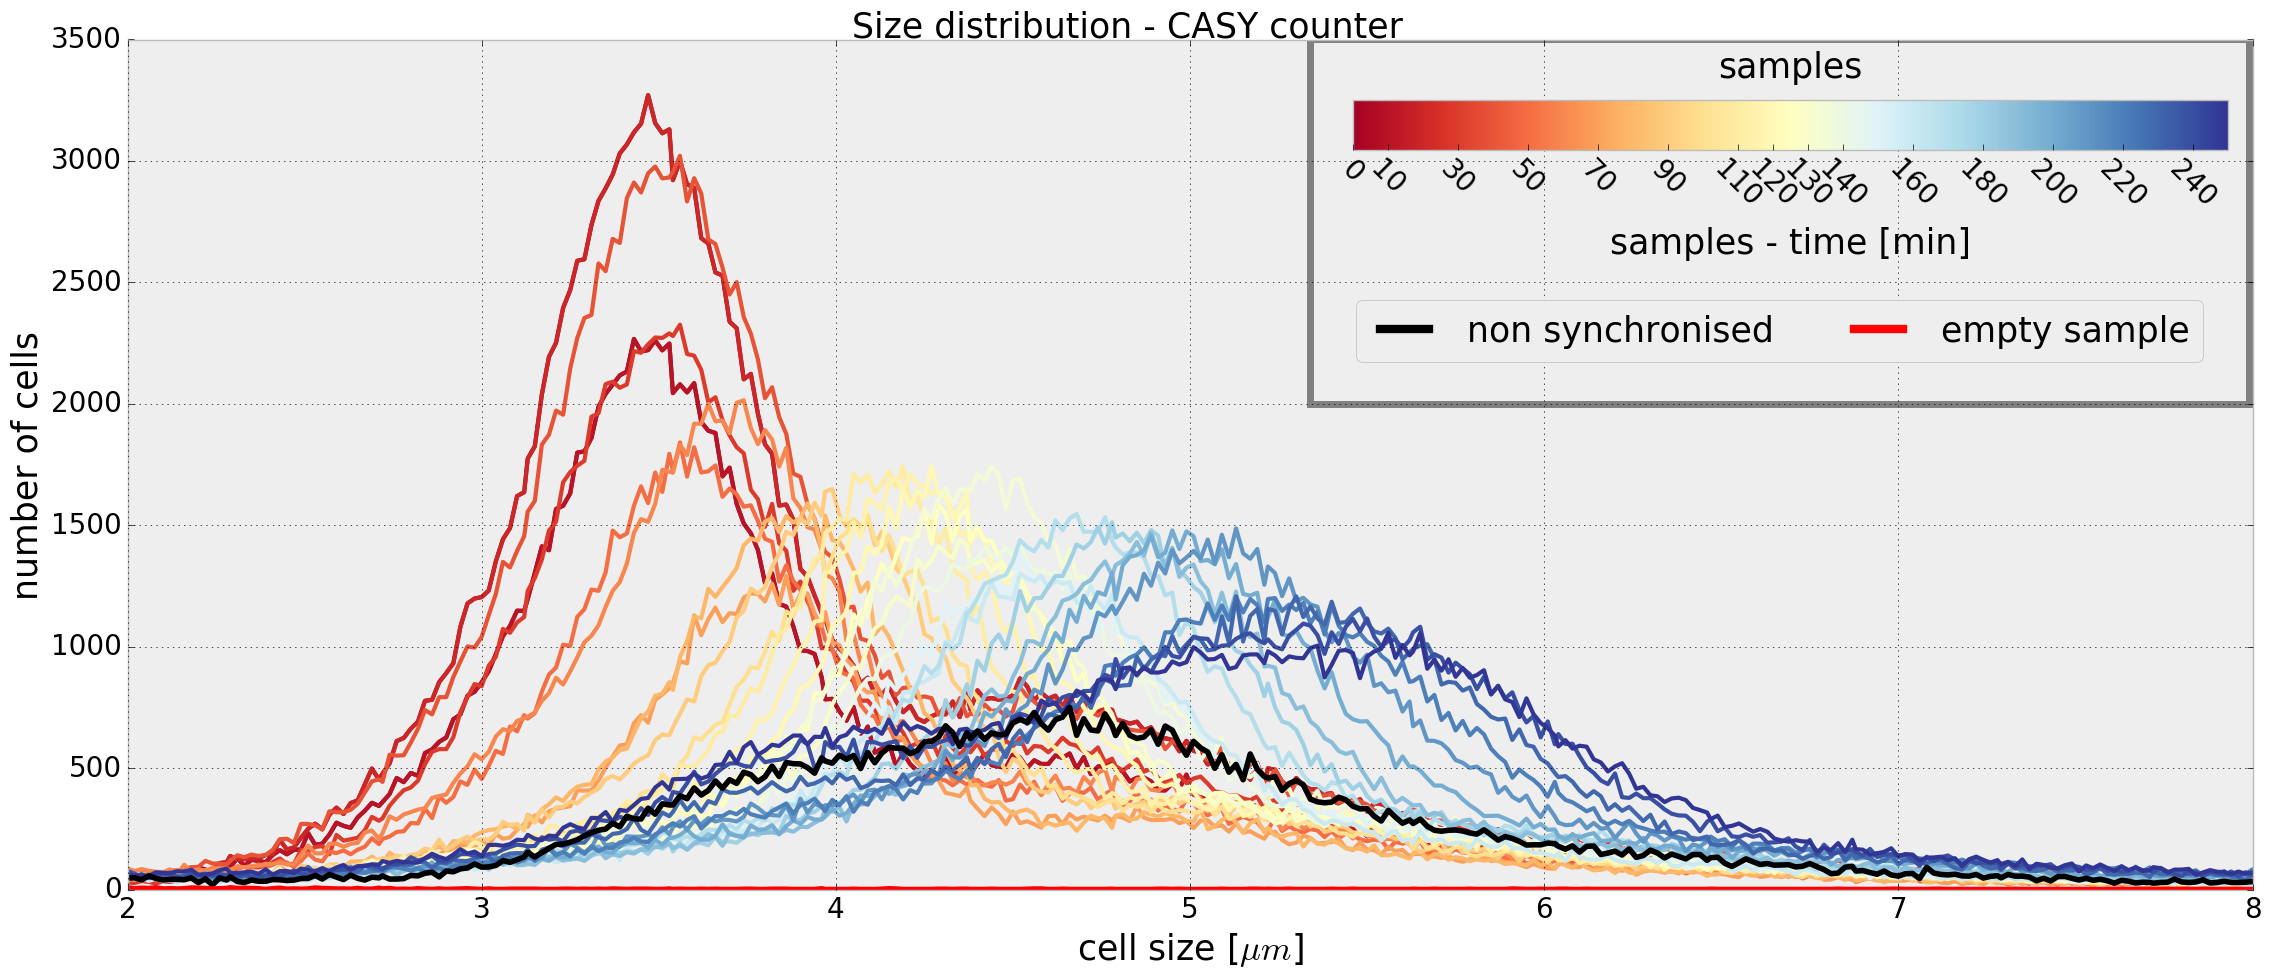

In [33]:
mpl.style.use('bmh')  # plot in different style

# get colours
from cycler import cycler  # automatically choose colours
cm = plt.get_cmap('gist_heat_r')  # select colourmap
cm = plt.get_cmap('RdYlBu')  # select colourmap

# get numeric values of datapoints (colour selection)
# adjust later for colorbar ticks
colorbar_labels = [el for el in sample_names]
colorbar_labels[0] = '0.01'
colorbar_labels[1] = '0.01'
colorbar_labels[-2] = '240'
colorbar_labels[-1] = '250'

# initialise Canvas object
fig = plt.figure(figsize=(25,10))
# initialise Axes object
ax = fig.add_axes([0.1, 0.1, 0.85, 0.85])

# set up Cycler, color selection based on time sample distance
ax.set_prop_cycle(cycler('color', [cm(float(i)/250) for i in colorbar_labels]))

# actual plotting
# make exceptions for empty and non-synchronised samples
for i, sample in enumerate(sample_names):
    if i == 28:
        lp = ax.plot(sizes, df_times[df_times.columns[i]], 
                     label='non synchronised',  # get label
                     linewidth=4, color='black')  # select line properties
    elif i == 29:
        lp = ax.plot(sizes, df_times[df_times.columns[i]], label='empty sample', linewidth=4, color='red')
    else:
        lp = ax.plot(sizes, df_times[df_times.columns[i]], label=sample, linewidth=3)
    
ax.set_xlim(2,8)  # select plot range
# set axis labels
ax.set_xlabel('cell size [$\mu m$]', fontsize=25)
ax.set_ylabel('number of cells', fontsize=25)
# adjust size of ticks
ax.tick_params(axis='both', labelsize=20)

# get hanndles and labels for legend
handles, labels = ax.get_legend_handles_labels()

# set up legend
leg=ax.legend(handles[-2:], labels[-2:],  # pass handles and labels (only last 2)
              fontsize=25,  # adjust fontsize
              bbox_to_anchor=(0.57, 0.60, 1., .102), loc=3,  # set position of legend
              ncol=2)  # make legend in columns

# select properties (linewidth) of legend
for legobj in leg.legendHandles:
    legobj.set_linewidth(6.0)

# adjust former created colorbar labels 
colorbar_labels[0] = '0'
colorbar_labels[1] = '0'
colorbar_ticks =[int(el) for el in colorbar_labels[:-1]]

# colorbar
# initialise Axes object
ax1 = fig.add_axes([0.59, 0.84, 0.35, 0.05])
# set title and position
ax1.set_title('samples', fontsize=25, y=1.3)
# select colormap
cmap = mpl.cm.RdYlBu
# normalise colormap to actual values
norm = mpl.colors.Normalize(vmin=250, vmax=0)
# create colorbar
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='horizontal')
# set main label and position
cb1.set_label('samples - time [min]', fontsize=25, labelpad=10)
# set ticks and ticklabels
cb1.set_ticks(colorbar_ticks[::2])  # set
cb1.set_ticklabels(colorbar_labels[::2])  # labels
cb1.ax.tick_params(labelsize=20)  # size
cb1.ax.set_xticklabels(cb1.ax.get_xticklabels(), rotation=-45)  # rotate
# invert axis
cb1.ax.invert_yaxis() 
 
# draw frame
rect =  mpl.patches.Rectangle(
        (5.34, 2000),   # (x,y)
        2.65,         # width
        1500,         # height
        fill=False,   # no filling
        linewidth=5,  # line
        color='grey') # colour
ax.add_patch(rect)  # draw

# get canvas title
fig.suptitle('Size distribution - CASY counter', fontsize=25)
# save figure
fig.savefig('20160820_SizeDist.pdf')